In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz as gv
from graphviz import Source
from sklearn import tree
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24
#Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))

In [2]:
test_data_orig = pd.read_csv(os.path.join('data', 'loanDataTest.csv'))
pd.set_option('display.max_columns', None)
test_data_orig

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [3]:
train_data_orig = pd.read_csv(os.path.join('data', 'loanDataTrain.csv'))
pd.set_option('display.max_columns', None)
train_data_orig

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Check values in test and train sets
test_Gender = test_data_orig.Gender.unique()
train_Gender = train_data_orig.Gender.unique()
test_Dependents = test_data_orig.Dependents.unique()
train_Dependents = train_data_orig.Dependents.unique()
test_Education = test_data_orig.Education.unique()
train_Education = train_data_orig.Education.unique()
test_Self_Employed = test_data_orig.Self_Employed.unique()
train_Self_Employed = train_data_orig.Self_Employed.unique()
test_ApplicantIncome = test_data_orig.ApplicantIncome.unique()
train_ApplicantIncome = train_data_orig.ApplicantIncome.unique()
test_CoapplicantIncome = test_data_orig.CoapplicantIncome.unique()
train_CoapplicantIncome = train_data_orig.CoapplicantIncome.unique()
test_LoanAmount = test_data_orig.LoanAmount.unique()
train_LoanAmount = train_data_orig.LoanAmount.unique()
test_Loan_Amount_Term = test_data_orig.Loan_Amount_Term.unique()
train_Loan_Amount_Term = train_data_orig.Loan_Amount_Term.unique()
test_Credit_History = test_data_orig.Credit_History.unique()
train_Credit_History = train_data_orig.Credit_History.unique()
test_Property_Area = test_data_orig.Property_Area.unique()
train_Property_Area = train_data_orig.Property_Area.unique()

train_Loan_Status = train_data_orig.Loan_Status.unique()

#Print out values
#test_Gender, train_Gender, test_Dependents, train_Dependents, test_Education, train_Education, test_Self_Employed, train_Self_Employed, test_ApplicantIncome, train_ApplicantIncome, test_CoapplicantIncome, train_CoapplicantIncome, test_LoanAmount, train_LoanAmount, test_Loan_Amount_Term, train_Loan_Amount_Term, test_Credit_History, train_Credit_History, test_Property_Area, train_Property_Area, train_Loan_Status

In [5]:
#drop nans
test_data = test_data_orig.dropna(axis=0)
train_data_pre_dummy = train_data_orig.dropna(axis=0)

test_Gender = test_data.Gender.unique()
train_Gender = train_data_pre_dummy.Gender.unique()
test_Dependents = test_data.Dependents.unique()
train_Dependents = train_data_pre_dummy.Dependents.unique()
test_Education = test_data.Education.unique()
train_Education = train_data_pre_dummy.Education.unique()
test_Self_Employed = test_data.Self_Employed.unique()
train_Self_Employed = train_data_pre_dummy.Self_Employed.unique()
test_ApplicantIncome = test_data.ApplicantIncome.unique()
train_ApplicantIncome = train_data_pre_dummy.ApplicantIncome.unique()
test_CoapplicantIncome = test_data.CoapplicantIncome.unique()
train_CoapplicantIncome = train_data_pre_dummy.CoapplicantIncome.unique()
test_LoanAmount = test_data.LoanAmount.unique()
train_LoanAmount = train_data_pre_dummy.LoanAmount.unique()
test_Loan_Amount_Term = test_data.Loan_Amount_Term.unique()
train_Loan_Amount_Term = train_data_pre_dummy.Loan_Amount_Term.unique()
test_Credit_History = test_data.Credit_History.unique()
train_Credit_History = train_data_pre_dummy.Credit_History.unique()
test_Property_Area = test_data.Property_Area.unique()
train_Property_Area = train_data_pre_dummy.Property_Area.unique()

train_Loan_Status = train_data_pre_dummy.Loan_Status.unique()

#Print out categorical values
test_Gender, train_Gender, test_Dependents, train_Dependents, test_Education, train_Education, test_Self_Employed, train_Self_Employed, train_Loan_Amount_Term, test_Credit_History, train_Credit_History, test_Property_Area, train_Property_Area, train_Loan_Status

(array(['Male', 'Female'], dtype=object),
 array(['Male', 'Female'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['1', '0', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.]),
 array([1., 0.]),
 array([1., 0.]),
 array(['Urban', 'Semiurban', 'Rural'], dtype=object),
 array(['Rural', 'Urban', 'Semiurban'], dtype=object),
 array(['N', 'Y'], dtype=object))

In [6]:
#Make loan status a dummy variable, drop the "N" column
train_data = pd.get_dummies(train_data_pre_dummy, prefix=['Loan_Status'], columns=['Loan_Status'])
train_data.drop('Loan_Status_N', axis=1, inplace=True)
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [7]:
#Replace "3+" in dependents with "3" - not perfect, but easier to deal with
train_data = train_data.replace(['3+'],'3')
test_data = test_data.replace(['3+'],'3')

In [8]:
#Limited dummy variables
train_data_limit_dummies = pd.get_dummies(train_data, prefix=['Gender'], columns=['Gender'])
train_data_limit_dummies.drop('Gender_Male', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data, prefix=['Gender'], columns=['Gender'])
test_data_limit_dummies.drop('Gender_Male', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Education'], columns=['Education'])
train_data_limit_dummies.drop('Education_Not Graduate', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Education'], columns=['Education'])
test_data_limit_dummies.drop('Education_Not Graduate', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Married'], columns=['Married'])
train_data_limit_dummies.drop('Married_No', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Married'], columns=['Married'])
test_data_limit_dummies.drop('Married_No', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Self_Employed'], columns=['Self_Employed'])
train_data_limit_dummies.drop('Self_Employed_No', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Self_Employed'], columns=['Self_Employed'])
test_data_limit_dummies.drop('Self_Employed_No', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Credit_History'], columns=['Credit_History'])
train_data_limit_dummies.drop('Credit_History_0.0', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Credit_History'], columns=['Credit_History'])
test_data_limit_dummies.drop('Credit_History_0.0', axis=1, inplace=True)

train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Property_Area'], columns=['Property_Area'])
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Property_Area'], columns=['Property_Area'])

train_data_limit_dummies

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status_Y,Gender_Female,Education_Graduate,Married_Yes,Self_Employed_Yes,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,4583,1508.0,128.0,360.0,0,0,1,1,0,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1,0,1,1,1,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1,0,0,1,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1,0,1,0,0,1,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1,1,1,0,0,1,1,0,0
610,LP002979,3,4106,0.0,40.0,180.0,1,0,1,1,0,1,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1,0,1,1,0,1,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1,0,1,1,0,1,0,0,1


## 1. Decision Tree: train on randomly split training set with dummies, random_state = 57

In [9]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [10]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns
feature_names_all = feature_names


In [11]:
from sklearn import tree

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7166666666666667

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 

graph.format = 'png'
graph.render('static/model_images/Decision_tree_1',view=True)

#graph 

'static/model_images/Decision_tree_1.png'

## 2. Decision Tree: train on randomly split training set with dummies, random_state = 57, max_depth = 3 

In [15]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [16]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [18]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.775

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('static/model_images/Decision_tree_2',view=True)

'static/model_images/Decision_tree_2.png'

## 3. Decision Tree: train on randomly split training set with dummies, random_state = 57, max_depth = 3, take out Loan_Amount_Term column

In [20]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [21]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [23]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7916666666666666

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('static/model_images/Decision_tree_3',view=True)

'static/model_images/Decision_tree_3.png'

## 4. Decision Tree: train on randomly split training set with dummies, random_state = 57, max_depth = 3, take out Loan_Amount_Term  and LoanAmount columns, since these could be considered results

In [25]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [26]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'LoanAmount', 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [28]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7416666666666667

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('static/model_images/Decision_tree_4',view=True)

'static/model_images/Decision_tree_4.png'

## 5. Random Forest: train on randomly split training set with dummies, random_state = 57, n_estimators = 200

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [33]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7777777777777778
Test score:  0.7666666666666667


In [34]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2526233471237452, 'Credit_History_1.0'),
 (0.19986598145249707, 'LoanAmount'),
 (0.19054497754389954, 'ApplicantIncome'),
 (0.10296256857020115, 'CoapplicantIncome'),
 (0.0512058296656554, 'Dependents'),
 (0.04934478462689787, 'Loan_Amount_Term'),
 (0.0317780196517824, 'Married_Yes'),
 (0.02266081986049428, 'Gender_Female'),
 (0.02265388372146898, 'Property_Area_Semiurban'),
 (0.02263809327894733, 'Education_Graduate'),
 (0.02057804769902027, 'Self_Employed_Yes'),
 (0.018002461655580376, 'Property_Area_Rural'),
 (0.015141185149810277, 'Property_Area_Urban')]

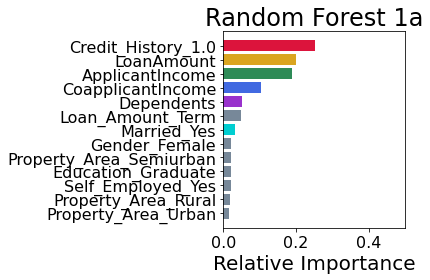

In [35]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 13
colors[12] = 'crimson'
colors[11] = 'goldenrod'
colors[10] = 'seagreen'
colors[9] = 'royalblue'
colors[8] = 'darkorchid'#dep
colors[6] = 'darkturquoise'#mar
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('Random Forest 1a', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.savefig('static/model_images/RF_1a.png')
plt.show()

In [36]:
#Create a random forest classifier with parameter modifications suggested in 
#https://scikit-learn.org/stable/modules/ensemble.html#forest
rf = RandomForestClassifier(n_estimators=200, oob_score = True, max_features=None, max_depth=None, min_samples_split=2)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score, parameters added: ', rf.score(X_train, y_train))
print('Training score with oob sampling, parameters added: ', rf.oob_score_)
print('Test score, parameters added: ', rf.score(X_test, y_test))

Training score, parameters added:  1.0
Training score with oob sampling, parameters added:  0.7916666666666666
Test score, parameters added:  0.7666666666666667


In [37]:
# Examine feature importances with added parameters
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3074314980099167, 'Credit_History_1.0'),
 (0.2186429660513768, 'ApplicantIncome'),
 (0.19014897442665452, 'LoanAmount'),
 (0.08913084990077784, 'CoapplicantIncome'),
 (0.040371164396695775, 'Loan_Amount_Term'),
 (0.036330629170628764, 'Dependents'),
 (0.02968971551643579, 'Married_Yes'),
 (0.017441304816749426, 'Property_Area_Semiurban'),
 (0.0170922471923128, 'Property_Area_Rural'),
 (0.014633050750688386, 'Education_Graduate'),
 (0.014609436797240713, 'Self_Employed_Yes'),
 (0.013694101855380668, 'Gender_Female'),
 (0.010784061115141816, 'Property_Area_Urban')]

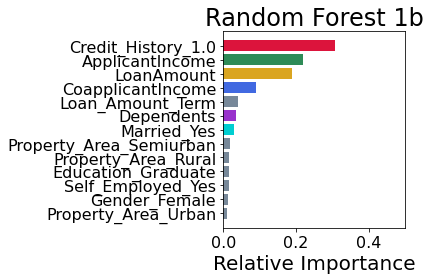

In [38]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 13
colors[12] = 'crimson'
colors[11] = 'seagreen'
colors[10] = 'goldenrod'
colors[9] = 'royalblue'
colors[7] = 'darkorchid'#dep
colors[6] = 'darkturquoise'#mar
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('Random Forest 1b', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.savefig('static/model_images/RF_1b.png')
plt.show()



## 6. Random Forest: train on randomly split training set with dummies, random_state = 57, n_estimators = 200, take out Loan_Amount_Term column

In [39]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [41]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7972222222222223
Test score:  0.7666666666666667


In [42]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2580657191199037, 'Credit_History_1.0'),
 (0.2134386646812916, 'LoanAmount'),
 (0.2121081890876039, 'ApplicantIncome'),
 (0.10372919244667292, 'CoapplicantIncome'),
 (0.04927570750487779, 'Dependents'),
 (0.030664948691828245, 'Married_Yes'),
 (0.0272681289160775, 'Education_Graduate'),
 (0.024155487391300818, 'Gender_Female'),
 (0.022352033548583197, 'Property_Area_Semiurban'),
 (0.021917760559161427, 'Property_Area_Rural'),
 (0.020840209100110505, 'Self_Employed_Yes'),
 (0.016183958952588583, 'Property_Area_Urban')]

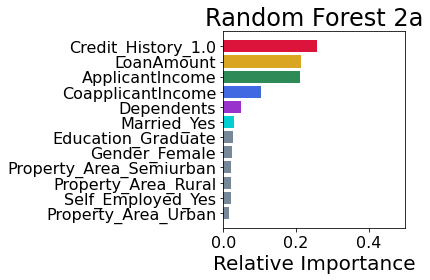

In [43]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 12
colors[11] = 'crimson'
colors[10] = 'goldenrod'
colors[9] = 'seagreen'
colors[8] = 'royalblue'
colors[7] = 'darkorchid'#dep
colors[6] = 'darkturquoise'#mar
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('Random Forest 2a', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.savefig('static/model_images/RF_2a.png')
plt.show()




In [44]:
#Create a random forest classifier with parameter modifications suggested in 
#https://scikit-learn.org/stable/modules/ensemble.html#forest
rf = RandomForestClassifier(n_estimators=200, oob_score = True, max_features=None, max_depth=None, min_samples_split=2)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score, parameters added: ', rf.score(X_train, y_train))
print('Training score with oob sampling, parameters added: ', rf.oob_score_)
print('Test score, parameters added: ', rf.score(X_test, y_test))

Training score, parameters added:  1.0
Training score with oob sampling, parameters added:  0.7833333333333333
Test score, parameters added:  0.7333333333333333


In [45]:
# Examine feature importances with added parameters
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3023962963823179, 'Credit_History_1.0'),
 (0.22809344000277257, 'ApplicantIncome'),
 (0.2066111677663138, 'LoanAmount'),
 (0.0965550669455474, 'CoapplicantIncome'),
 (0.03601467443427088, 'Dependents'),
 (0.029737044670136617, 'Married_Yes'),
 (0.018806043039200256, 'Property_Area_Semiurban'),
 (0.01805519170861955, 'Education_Graduate'),
 (0.017480862996717028, 'Property_Area_Rural'),
 (0.016950050450855944, 'Self_Employed_Yes'),
 (0.016093252973743765, 'Gender_Female'),
 (0.01320690862950416, 'Property_Area_Urban')]

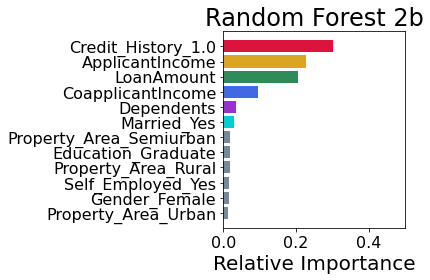

In [46]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 12
colors[11] = 'crimson'
colors[10] = 'goldenrod'
colors[9] = 'seagreen'
colors[8] = 'royalblue'
colors[7] = 'darkorchid'#dep
colors[6] = 'darkturquoise'#mar
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('Random Forest 2b', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.savefig('static/model_images/RF_2b.png')
plt.show()





## 7. Random Forest: train on randomly split training set with dummies, random_state = 57, n_estimators = 200, take out Loan_Amount_Term  and LoanAmount columns, since these could be considered results 

In [47]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'LoanAmount', 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [49]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.9972222222222222
Training score with oob sampling:  0.7722222222222223
Test score:  0.7333333333333333


In [50]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.345452460023679, 'ApplicantIncome'),
 (0.2618885792057065, 'Credit_History_1.0'),
 (0.14219470746246635, 'CoapplicantIncome'),
 (0.06654502627812468, 'Dependents'),
 (0.038236295617551354, 'Married_Yes'),
 (0.030890780625540907, 'Education_Graduate'),
 (0.026211183359127147, 'Gender_Female'),
 (0.02507522256902503, 'Self_Employed_Yes'),
 (0.024146129586684745, 'Property_Area_Semiurban'),
 (0.02092028316992097, 'Property_Area_Rural'),
 (0.018439332102173408, 'Property_Area_Urban')]

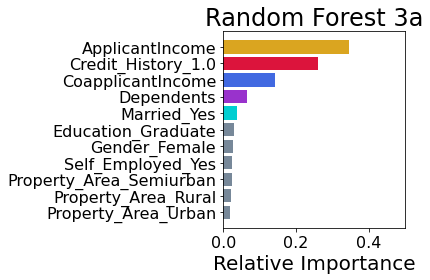

In [51]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 11
colors[9] = 'crimson'
colors[10] = 'goldenrod'
colors[8] = 'royalblue'
colors[7] = 'darkorchid'#dep
colors[6] = 'darkturquoise'#mar
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('Random Forest 3a', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.savefig('static/model_images/RF_3a.png')
plt.show()



In [52]:
#Create a random forest classifier with parameter modifications suggested in 
#https://scikit-learn.org/stable/modules/ensemble.html#forest
rf = RandomForestClassifier(n_estimators=200, oob_score = True, max_features=None, max_depth=None, min_samples_split=2)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score, parameters added: ', rf.score(X_train, y_train))
print('Training score with oob sampling, parameters added: ', rf.oob_score_)
print('Test score, parameters added: ', rf.score(X_test, y_test))

Training score, parameters added:  0.9972222222222222
Training score with oob sampling, parameters added:  0.7722222222222223
Test score, parameters added:  0.725


In [53]:
# Examine feature importances with added parameters
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.35611216317855804, 'ApplicantIncome'),
 (0.3022320132178544, 'Credit_History_1.0'),
 (0.12637470889116537, 'CoapplicantIncome'),
 (0.05050034030225596, 'Dependents'),
 (0.036548622581675766, 'Married_Yes'),
 (0.02661097619387111, 'Property_Area_Semiurban'),
 (0.025506966996625594, 'Property_Area_Rural'),
 (0.02338142609634311, 'Education_Graduate'),
 (0.018925140624526687, 'Gender_Female'),
 (0.018903879602010214, 'Self_Employed_Yes'),
 (0.014903762315113806, 'Property_Area_Urban')]

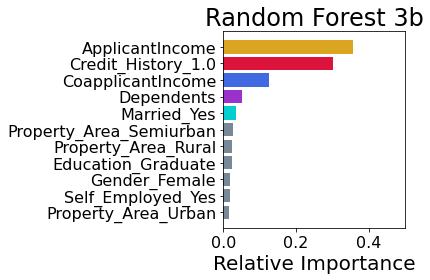

In [54]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 11
colors[9] = 'crimson'
colors[10] = 'goldenrod'
colors[8] = 'royalblue'
colors[7] = 'darkorchid'#dep
colors[6] = 'darkturquoise'#mar
plt.title('Random Forest 3b', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.savefig('static/model_images/RF_3b.png')
plt.show()



#https://scikit-learn.org/stable/modules/ensemble.html#forest
#max_features=None, max_depth=None, min_samples_split=2 suggested (in this particular case, decreased score by about 0.05)

#Also suggest: "...in random forests, bootstrap samples are used by default (bootstrap=True) while the default strategy for extra-trees is to use the whole dataset (bootstrap=False). When using bootstrap sampling the generalization accuracy can be estimated on the left out or out-of-bag samples. This can be enabled by setting oob_score=True."

## 8. Random Forest: train on randomly split training set with dummies, random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with importance < 0.03 in both versions of previous run ('Property_Area_Semiurban', 'Property_Area_Rural', 'Gender_Female', 'Education_Graduate', 'Self_Employed_Yes', 'Property_Area_Urban')

In [55]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Property_Area_Urban', 'Self_Employed_Yes', 'LoanAmount', 'Education_Graduate', 'Gender_Female', 'Loan_Amount_Term', 'Property_Area_Semiurban', 'Property_Area_Rural'], axis=1)
feature_names = data.columns

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [57]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.9972222222222222
Training score with oob sampling:  0.775
Test score:  0.6583333333333333


In [58]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.44684769389782547, 'ApplicantIncome'),
 (0.2948004669854603, 'Credit_History_1.0'),
 (0.1701780992595863, 'CoapplicantIncome'),
 (0.057830516540874115, 'Dependents'),
 (0.030343223316253855, 'Married_Yes')]

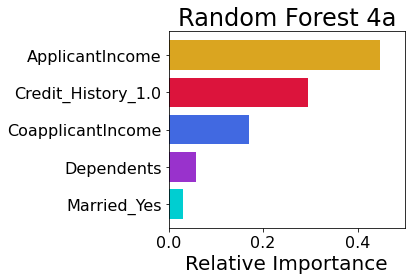

In [59]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 5
colors[3] = 'crimson'
colors[4] = 'goldenrod'
colors[2] = 'royalblue'
colors[1] = 'darkorchid'#dep
colors[0] = 'darkturquoise'#mar
plt.title('Random Forest 4a', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.savefig('static/model_images/RF_4a.png')
plt.show()



In [60]:
#Create a random forest classifier with parameter modifications suggested in 
#https://scikit-learn.org/stable/modules/ensemble.html#forest
rf = RandomForestClassifier(n_estimators=200, oob_score = True, max_features=None, max_depth=None, min_samples_split=2)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score, parameters added: ', rf.score(X_train, y_train))
print('Training score with oob sampling, parameters added: ', rf.oob_score_)
print('Test score, parameters added: ', rf.score(X_test, y_test))

Training score, parameters added:  0.9972222222222222
Training score with oob sampling, parameters added:  0.7777777777777778
Test score, parameters added:  0.6666666666666666


In [61]:
# Examine feature importances with added parameters
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4488622938006201, 'ApplicantIncome'),
 (0.3067832613185682, 'Credit_History_1.0'),
 (0.15208620616572457, 'CoapplicantIncome'),
 (0.05437634149595646, 'Dependents'),
 (0.037891897219130645, 'Married_Yes')]

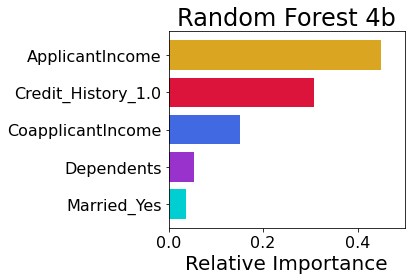

In [62]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 5
colors[3] = 'crimson'
colors[4] = 'goldenrod'
colors[2] = 'royalblue'
colors[1] = 'darkorchid'#dep
colors[0] = 'darkturquoise'#mar
plt.title('Random Forest 4b', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.savefig('static/model_images/RF_4b.png')
plt.show()


### 9. Limited set, decision tree

In [63]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [64]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Property_Area_Urban', 'Self_Employed_Yes', 'LoanAmount', 'Education_Graduate', 'Gender_Female', 'Loan_Amount_Term', 'Property_Area_Semiurban', 'Property_Area_Rural'], axis=1)
feature_names = data.columns

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [66]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.625

In [67]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('static/model_images/Decision_tree_5',view=True)

'static/model_images/Decision_tree_5.png'

### 9. Limited set, smaller decision tree

In [68]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [69]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Property_Area_Urban', 'Self_Employed_Yes', 'LoanAmount', 'Education_Graduate', 'Gender_Female', 'Loan_Amount_Term', 'Property_Area_Semiurban', 'Property_Area_Rural'], axis=1)
feature_names = data.columns

In [70]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [71]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7416666666666667

In [72]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('static/model_images/Decision_tree_6',view=True)
#graph

'static/model_images/Decision_tree_6.png'